In [ ]:
# ML Project
# Group 15 
# Akshat Saini - 2020019
# Nakul Thureja - 2020528
# Nishaant Rastogi - 2020091

In [ ]:
! pip install wfdb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 6.4 MB/s eta 0:00:00


In [ ]:
# from google.colab import drive
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.preprocessing import StandardScaler, MultiLabelBinarizer
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wfdb
from pathlib import Path
import pickle
import os
import requests
import zipfile
import gzip
import ast
import time
import numpy as np
import wfdb
import ast
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import mpl
from scipy.fftpack import fft, ifft 
from scipy import signal
import os
import pickle
from keras.models import Model, Sequential
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras import layers, optimizers, losses, metrics, regularizers, callbacks

from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
sampling_rate = 100

In [ ]:
X = pickle.load(open('/content/drive/MyDrive/PTB-XL/X_nk.pkl', 'rb'))
y = pickle.load(open('/content/drive/MyDrive/PTB-XL/y_nk.pkl', 'rb'))

In [ ]:
X.shape

(21393, 23)

In [ ]:
y.shape

(21393,)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [ ]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
X_train = imp.fit_transform(X_train) # X_imp is the input data with no missing values
X_test = imp.transform(X_test)

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(k_neighbors=5, sampling_strategy='not majority')
X_res, y_res = sm.fit_resample(X_train, y_train)


In [ ]:
X_train.shape, y_train.shape

((17114, 20), (17114,))

In [ ]:
X_test.shape, y_test.shape

((4279, 20), (4279,))

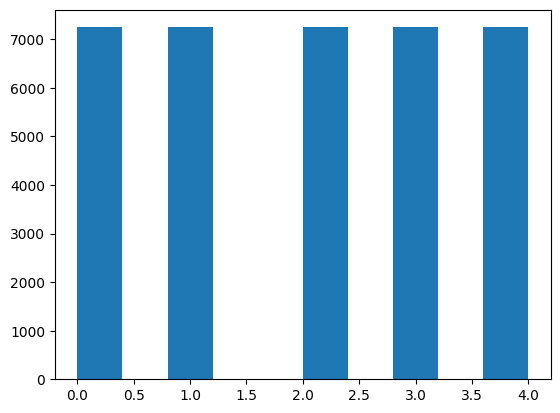

In [ ]:
plt.hist(y_res)
plt.show()

###Models

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score,accuracy_score

In [ ]:
# XGBoost Classifier
from xgboost import XGBClassifier


for train_class in range(5):
    print("----training classifier for %s----"%(train_class))
    y_train_class = (y_res == train_class)
    y_test_class = (y_test == train_class)
    
    xgb = XGBClassifier()

    xgb.fit(X_res, y_train_class)
    xgb_y_predict = xgb.predict(X_test)
    xgb_y_predict_train = xgb.predict(X_res)
    
    xgb_score1 = accuracy_score(xgb_y_predict_train, y_train_class)
    xgb_score = accuracy_score(xgb_y_predict, y_test_class)
    y_prob = xgb.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test_class, y_prob)

    print("Train Accuracy: %.3f" % xgb_score1)
    print("Test Accuracy: %.3f" % xgb_score)
    print(f"ROC AUC Score: {roc_auc:.2f}")
    print("precision: %.3f" % precision_score(y_test_class, xgb_y_predict))
    print("recall: %.3f" % recall_score(y_test_class, xgb_y_predict))
    print("f1-score: %.3f" % f1_score(y_test_class, xgb_y_predict))
    pickle.dump(xgb,open('/content/drive/MyDrive/Models_NeuroKit/xgb'+str(train_class)+".pkl", 'wb'))


----training classifier for 0----
Train Accuracy: 0.863
Test Accuracy: 0.607
ROC AUC Score: 0.66
precision: 0.584
recall: 0.216
f1-score: 0.315
----training classifier for 1----
Train Accuracy: 0.852
Test Accuracy: 0.839
ROC AUC Score: 0.50
precision: 0.114
recall: 0.013
f1-score: 0.023
----training classifier for 2----
Train Accuracy: 0.870
Test Accuracy: 0.875
ROC AUC Score: 0.56
precision: 0.191
recall: 0.035
f1-score: 0.060
----training classifier for 3----
Train Accuracy: 0.847
Test Accuracy: 0.793
ROC AUC Score: 0.52
precision: 0.293
recall: 0.034
f1-score: 0.061
----training classifier for 4----
Train Accuracy: 0.868
Test Accuracy: 0.867
ROC AUC Score: 0.53
precision: 0.182
recall: 0.027
f1-score: 0.047


In [ ]:
from sklearn.svm import SVC

for train_class in range(0,5):
    print("----training classifier for %s----"%([train_class]))
    y_train_x = (y_res == train_class)
    y_test_class = (y_test == train_class)
    svm = SVC(kernel='poly',degree = 3)    
    svm.fit(X_res, y_train_x)
    svm_y_predict = svm.predict(X_test)
    svm_y_predict_train = svm.predict(X_res)

    svm_score1 = accuracy_score(svm_y_predict_train, y_res)
    svm_score = accuracy_score(svm_y_predict, y_test_class)
    y_scores = svm.decision_function(X_test)
    roc_auc = roc_auc_score(y_test_class, y_scores) 


    print("Train Accuracy: %.3f" % svm_score1)
    print("Test Accuracy: %.3f" % svm_score)
    print(f"ROC AUC Score: {roc_auc:.2f}")
    print("precision: %.3f" % precision_score(y_test_class, svm_y_predict, zero_division=1.0))
    print("recall: %.3f" % recall_score(y_test_class, svm_y_predict, zero_division=1.0))
    print("f1-score: %.3f" % f1_score(y_test_class, svm_y_predict, zero_division=1.0))
    pickle.dump(svm,open('/content/drive/MyDrive/Models_NeuroKit/svm'+str(train_class)+".pkl", 'wb'))


----training classifier for [0]----
Train Accuracy: 0.200
Test Accuracy: 0.573
ROC AUC Score: 0.49
precision: 1.000
recall: 0.000
f1-score: 0.000
----training classifier for [1]----
Train Accuracy: 0.200
Test Accuracy: 0.855
ROC AUC Score: 0.53
precision: 1.000
recall: 0.000
f1-score: 0.000
----training classifier for [2]----
Train Accuracy: 0.200
Test Accuracy: 0.893
ROC AUC Score: 0.58
precision: 1.000
recall: 0.000
f1-score: 0.000
----training classifier for [3]----
Train Accuracy: 0.200
Test Accuracy: 0.796
ROC AUC Score: 0.54
precision: 1.000
recall: 0.000
f1-score: 0.000
----training classifier for [4]----
Train Accuracy: 0.200
Test Accuracy: 0.882
ROC AUC Score: 0.54
precision: 1.000
recall: 0.000
f1-score: 0.000


In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict


for train_class in range(5):
    print("----training classifier for %s----"%([train_class]))
    y_train_x = (y_res == train_class)
    y_test_x = (y_test == train_class)
    
    forest_clf = RandomForestClassifier(random_state=0)
    forest_clf.fit(X_res, y_train_x)
    
    forest_y_predict = forest_clf.predict(X_test)
    forest_y_predict_train = forest_clf.predict(X_res)
    forest_score1 = accuracy_score(forest_y_predict_train, y_train_x)
    forest_score = accuracy_score(forest_y_predict, y_test_x)
   
    y_probas_forest = cross_val_predict(forest_clf, X_test, y_test_x, cv=5 ,method="predict_proba")    
    y_scores_forest = y_probas_forest[:, 1]
    y_train_pred = (y_scores_forest>=0.5)
    y_test_pred = forest_clf.predict(X_test)

    print("Train Accuracy: %.3f" % accuracy_score(forest_y_predict_train,y_train_x))
    print("Test Accuracy: %.3f" % accuracy_score(forest_y_predict,y_test_x))
    print("precision: %.3f" % precision_score(y_test_x, y_test_pred))
    print("recall: %.3f" % recall_score(y_test_x, y_test_pred))
    print("f1-score: %.3f" % f1_score(y_test_x, y_test_pred))
    print("roc score: %.3f" % roc_auc_score(y_test_x, y_scores_forest))
    pickle.dump(forest_clf,open('/content/drive/MyDrive/Models_NeuroKit/forest'+str(train_class)+".pkl", 'wb'))


----training classifier for [0]----
Train Accuracy: 0.999
Test Accuracy: 0.596
precision: 0.541
recall: 0.239
f1-score: 0.331
roc score: 0.648
----training classifier for [1]----
Train Accuracy: 0.999
Test Accuracy: 0.825
precision: 0.140
recall: 0.035
f1-score: 0.055
roc score: 0.534
----training classifier for [2]----
Train Accuracy: 1.000
Test Accuracy: 0.861
precision: 0.105
recall: 0.031
f1-score: 0.048
roc score: 0.533
----training classifier for [3]----
Train Accuracy: 0.999
Test Accuracy: 0.775
precision: 0.259
recall: 0.074
f1-score: 0.116
roc score: 0.528
----training classifier for [4]----
Train Accuracy: 0.999
Test Accuracy: 0.856
precision: 0.191
recall: 0.056
f1-score: 0.086
roc score: 0.514


In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


----training classifier for 0----
Train Accuracy: 0.200
Test Accuracy: 0.419
ROC AUC Score: 0.69
precision: 0.419
recall: 1.000
f1-score: 0.590


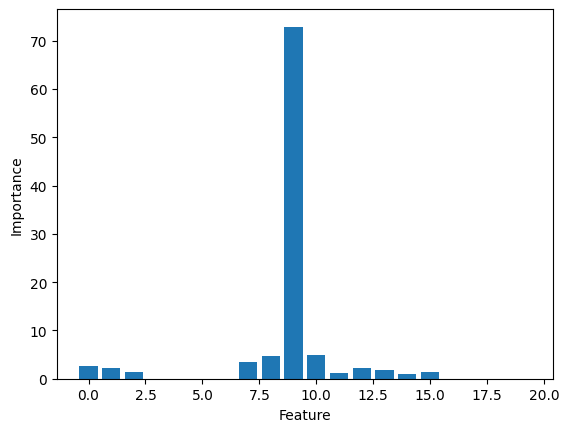

----training classifier for 1----
Train Accuracy: 0.200
Test Accuracy: 0.149
ROC AUC Score: 0.55
precision: 0.149
recall: 1.000
f1-score: 0.259


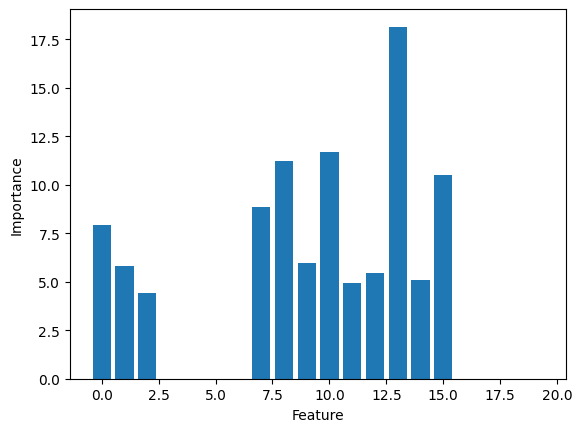

----training classifier for 2----
Train Accuracy: 0.200
Test Accuracy: 0.113
ROC AUC Score: 0.61
precision: 0.113
recall: 1.000
f1-score: 0.202


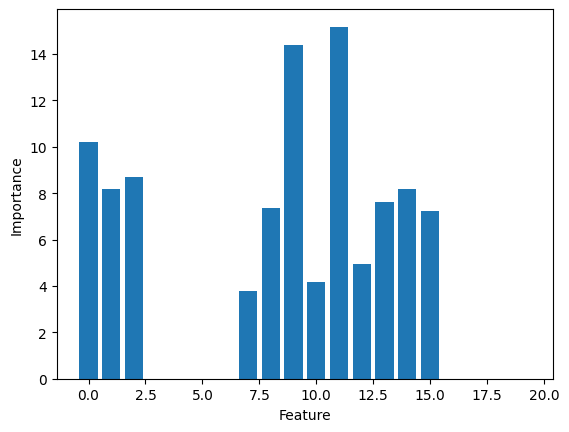

----training classifier for 3----
Train Accuracy: 0.200
Test Accuracy: 0.198
ROC AUC Score: 0.56
precision: 0.198
recall: 1.000
f1-score: 0.330


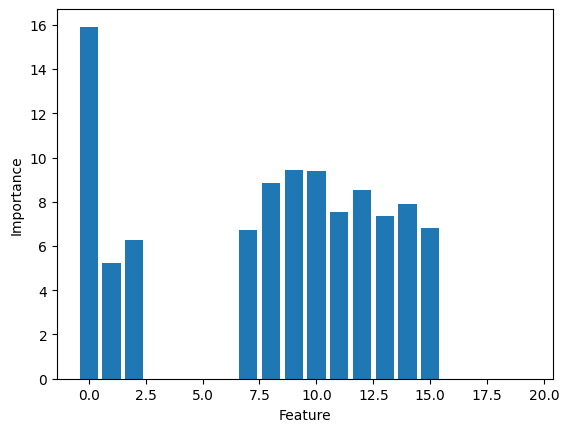

----training classifier for 4----
Train Accuracy: 0.200
Test Accuracy: 0.122
ROC AUC Score: 0.59
precision: 0.122
recall: 1.000
f1-score: 0.217


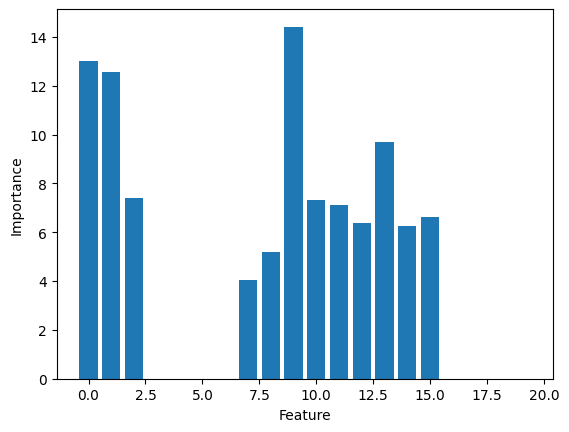

In [ ]:
# CatBoost Classifier 
from catboost import CatBoostClassifier, Pool

params = {
    "iterations": 100,
    "learning_rate": 0.1,
    "depth": 3,
    "loss_function": "Logloss",
    "verbose": False
}

for train_class in range(5):
    print("----training classifier for %s----"%(train_class))
    y_train_class = (y_res == train_class)
    y_test_class = (y_test == train_class)
    
    cat = CatBoostClassifier(**params)

    cat.fit(X_res, y_train_class)
    cat_y_predict = cat.predict(X_test)
    cat_y_predict_train = cat.predict(X_res)
    
    cat_y_predict = cat_y_predict.astype(bool)
    cat_y_predict_train = cat_y_predict_train.astype(bool)

    cat_score1 = accuracy_score(cat_y_predict_train, y_train_class)
    cat_score = accuracy_score(cat_y_predict, y_test_class)
    y_prob = cat.predict_proba(X_test)[:, 1]
    
    roc_auc = roc_auc_score(y_test_class, y_prob)

    print("Train Accuracy: %.3f" % cat_score1)
    print("Test Accuracy: %.3f" % cat_score)
    print(f"ROC AUC Score: {roc_auc:.2f}")
    print("precision: %.3f" % precision_score(y_test_class, cat_y_predict))
    print("recall: %.3f" % recall_score(y_test_class, cat_y_predict))
    print("f1-score: %.3f" % f1_score(y_test_class, cat_y_predict))

    # Get the feature importance values
    feature_importance = cat.get_feature_importance()

    # Plot the feature importance values as a bar chart
    plt.bar(range(len(feature_importance)), feature_importance)
    plt.xlabel("Feature")
    plt.ylabel("Importance")
    plt.show()
    pickle.dump(cat,open('/content/drive/MyDrive/Models_NeuroKit/cat'+str(train_class)+".pkl", 'wb'))


In [ ]:
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


----training classifier for 0----
Train Accuracy: 0.822
Test Accuracy: 0.591
ROC AUC Score: 0.67
precision: 0.587
recall: 0.081
f1-score: 0.142


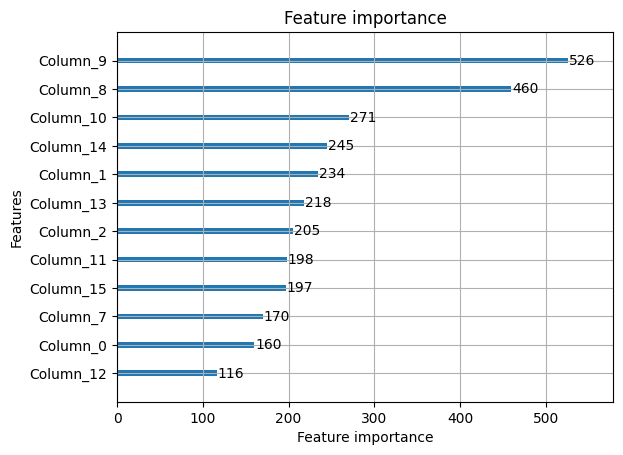

----training classifier for 1----
Train Accuracy: 0.815
Test Accuracy: 0.846
ROC AUC Score: 0.53
precision: 0.074
recall: 0.003
f1-score: 0.006


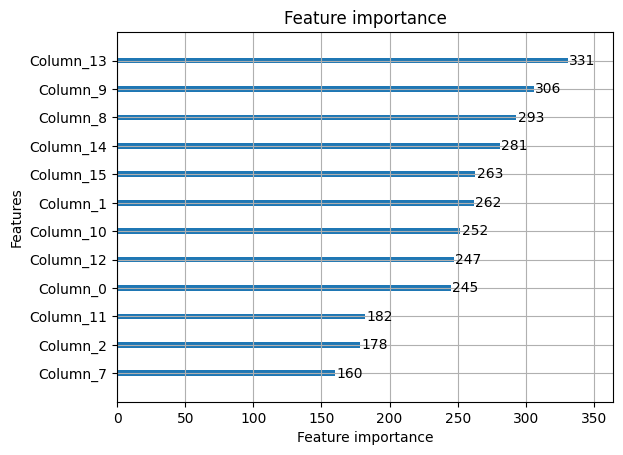

----training classifier for 2----
Train Accuracy: 0.823
Test Accuracy: 0.884
ROC AUC Score: 0.57
precision: 0.190
recall: 0.008
f1-score: 0.016


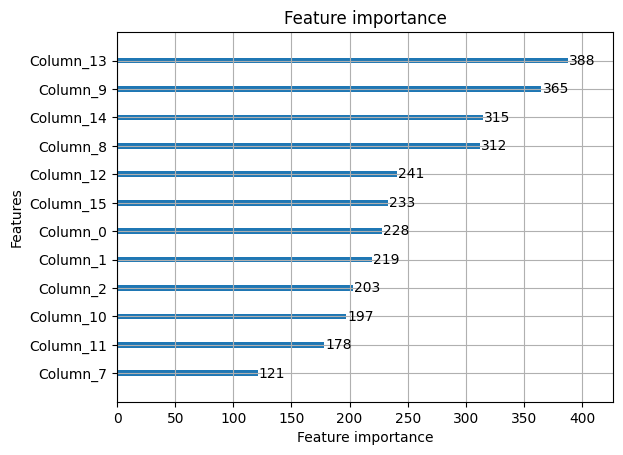

----training classifier for 3----
Train Accuracy: 0.809
Test Accuracy: 0.799
ROC AUC Score: 0.54
precision: 0.192
recall: 0.006
f1-score: 0.011


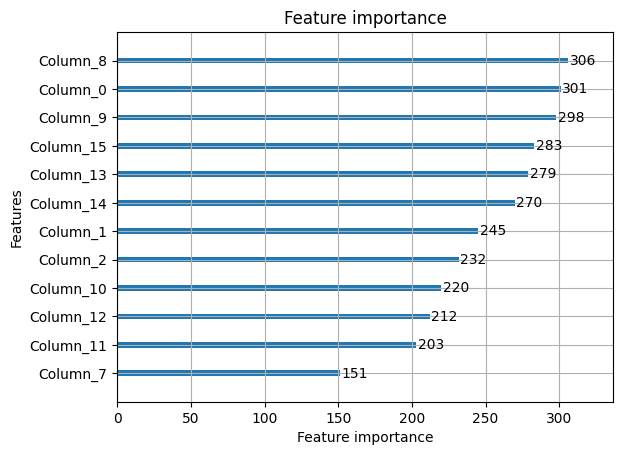

----training classifier for 4----
Train Accuracy: 0.821
Test Accuracy: 0.876
ROC AUC Score: 0.56
precision: 0.143
recall: 0.004
f1-score: 0.007


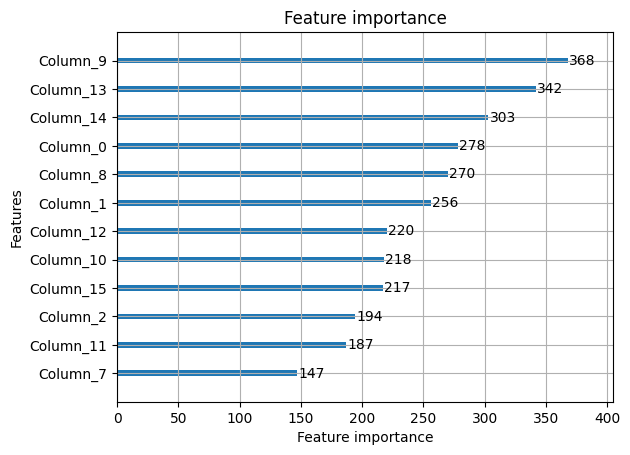

In [ ]:
# lgbmcBoost Classifier 
from lightgbm import LGBMClassifier
from lightgbm import plot_importance

params = {
    "n_estimators": 100,
    "learning_rate": 0.1,
    "num_leaves": 31,
    "verbose": -1
}


for train_class in range(5):
    print("----training classifier for %s----"%(train_class))
    y_train_class = (y_res == train_class)
    y_test_class = (y_test == train_class)
    
    lgbmc = LGBMClassifier(**params)

    lgbmc.fit(X_res, y_train_class)
    lgbmc_y_predict = lgbmc.predict(X_test)
    lgbmc_y_predict_train = lgbmc.predict(X_res)
    
    lgbmc_y_predict = lgbmc_y_predict.astype(bool)
    lgbmc_y_predict_train = lgbmc_y_predict_train.astype(bool)

    lgbmc_score1 = accuracy_score(lgbmc_y_predict_train, y_train_class)
    lgbmc_score = accuracy_score(lgbmc_y_predict, y_test_class)
    y_prob = lgbmc.predict_proba(X_test)[:, 1]
    
    roc_auc = roc_auc_score(y_test_class, y_prob)

    print("Train Accuracy: %.3f" % lgbmc_score1)
    print("Test Accuracy: %.3f" % lgbmc_score)
    print(f"ROC AUC Score: {roc_auc:.2f}")
    print("precision: %.3f" % precision_score(y_test_class, lgbmc_y_predict))
    print("recall: %.3f" % recall_score(y_test_class, lgbmc_y_predict))
    print("f1-score: %.3f" % f1_score(y_test_class, lgbmc_y_predict))
    plot_importance(lgbmc)
    plt.show()
    pickle.dump(lgbmc,open('/content/drive/MyDrive/Models_NeuroKit/lgbmc'+str(train_class)+".pkl", 'wb'))
